In [1]:
import stats
import time
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from math import inf
import numpy as np

In [2]:
maps = [map for map in stats.SingleRun(99).finalMaps['map'].iloc]

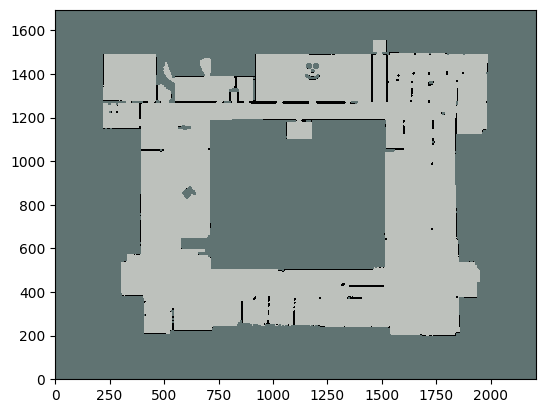

In [3]:
#plt.subplots(dpi=200)

get_size   = lambda map: (map['info']['height'], map['info']['width'])
get_origin = lambda map: map['info']['origin']['position']
get_res    = lambda map: map['info']['resolution']

min_x = min([get_origin(map)['x'] for map in maps])
min_y = min([get_origin(map)['y'] for map in maps])
max_x = max([get_origin(map)['x']+get_size(map)[1]*get_res(map) for map in maps])
max_y = max([get_origin(map)['y']+get_size(map)[0]*get_res(map) for map in maps])

h = round((max_y-min_y)/get_res(maps[0]))
w = round((max_x-min_x)/get_res(maps[0]))

img = np.zeros((h,w),dtype=np.int16)-1

for map in maps:
    res     = get_res(map) 
    left    = round((get_origin(map)['x'] - min_x)/res)
    right   = left + get_size(map)[1]
    bottom  = round((get_origin(map)['y'] - min_y)/res)
    up      = bottom + get_size(map)[0]
    section = img[bottom:up,left:right]
    img[bottom:up,left:right] = section * stats.get_map_img(map)
    img[bottom:up,left:right] = section * -1
    section[section>100] = 100
    section[section<-1]  = 100
    
stats.plot_map(img, plt.gca())
#img[img>100]

In [18]:
np.array([i for i in range(104)])[2:40]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])

loop1	step1:0.33, step2:0.05
loop1	step1:0.32, step2:0.07
loop1	step1:0.32, step2:0.05
loop1	step1:0.29, step2:0.04
loop1	step1:0.23, step2:0.03
loop1	step1:0.16, step2:0.02
loop1	step1:0.14, step2:0.02
loop1	step1:0.36, step2:0.05


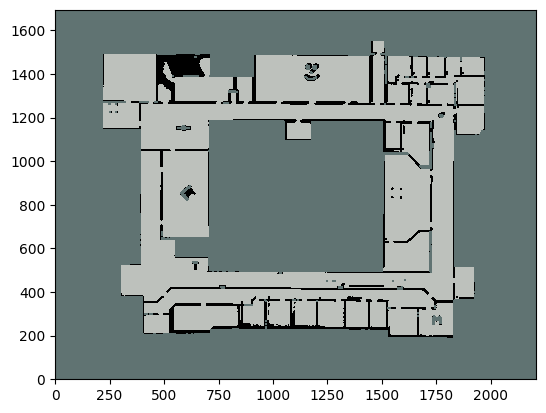

In [11]:
#plt.subplots(dpi=200)
real_map = stats.MAPS['office_big']

min_x = min([get_origin(map)['x'] for map in [real_map] + maps])
min_y = min([get_origin(map)['y'] for map in [real_map] + maps])
max_x = max([get_origin(map)['x']+get_size(map)[1]*get_res(map) for map in [real_map] + maps])
max_y = max([get_origin(map)['y']+get_size(map)[0]*get_res(map) for map in [real_map] + maps])

h = round((max_y-min_y)/get_res(maps[0]))
w = round((max_x-min_x)/get_res(maps[0]))

img = np.zeros((h,w),dtype=np.int16)-1

for idx, map in enumerate([real_map] + maps + [real_map]):
    now = time.time()
    res     = get_res(map) 
    left    = round((get_origin(map)['x'] - min_x)/res)
    right   = left + get_size(map)[1]
    bottom  = round((get_origin(map)['y'] - min_y)/res)
    up      = bottom + get_size(map)[0]
    section = img[bottom:up,left:right]
    map_img = stats.get_map_img(map)

    step1 = time.time()

    if idx==len(maps)+1:
        img[bottom:up,left:right] = section + map_img
        section[section==-2] = -1
        section[section==99] = 100
    else:
        img[bottom:up,left:right] = section * map_img
        if real_map and idx==0: img[img==0] = 100
        img[bottom:up,left:right] = section * -1
    section[section>100] = 100
    section[section<-1]  = 100

    step2 = time.time()
    print(f"loop1\tstep1:{round(step1-now,2)}, step2:{round(step2-step1,2)}")

stats.plot_map(img, plt.gca())

In [10]:
len(img)*len(img[0]) - len(img[img==-1]) - len(img[img==0]) - len(img[img==100])

0

In [9]:
#stats.plot_occ_grid(stats.SingleRun(99,real_map='office_big').get_final_map(old_method=True),plt.gca())

In [7]:
TS_bigoffice_3 = stats.TestSet(
    {'my': [107,106,104,185,186,187,190,191,275,276],
     'el': [197,199,72,404,198,195,192,193,194,198]},
     'office_big'
)

In [23]:
SR = stats.SingleRun(193, real_map='office_big')

In [7]:
TS_office2_3 = stats.TestSet(
    {'my': [299,169,170,171,172,301,303,302,300,304],
     'el': [173,174,175,176,177,178,179,180,216,217]},
    'office_2'
)
TS_office2_5 = stats.TestSet(
    {'my': [128,129,161,163,164,165,240,241,243,305],
     'el': [132,133,134,140,144,137,144,289,293,291]},
    'office_2'
)
TS_office2_8 = stats.TestSet(
    {'my': [120,121,122,125,124,123,250,246,247,306],
     'el': [114,115,116,118,119,251,294,295,296,308]},
    'office_2'
)
TS_bigoffice_3 = stats.TestSet(
    {'my': [107,106,104,185,186,187,190,191,275,276],
     'el': [197,199,72,404,198,195,192,193,194,198]},
     'office_big'
)
TS_bigoffice_5 = stats.TestSet(
    {'my': [399,39,81,402,99,101,207,209,211,210],
     'el': [24,22,29,31,30,32,202,277,278,279]},
    'office_big'
)
TS_bigoffice_8 = stats.TestSet(
    {'my': [20,43,60,65,91,93,94,95,97,288],
     'el': [46,51,52,54,69,280,285,282,345,350]},
    'office_big'
)
TS_map23_3 = stats.TestSet(
    {'my': [212,213,214,158,157,159,334,354,348,344],
     'el': [145,215,324,326,327,330,331,338,340,349]},
    'map23'
)
TS_E13_3 = stats.TestSet(
    {'my': [359,440,363,441,445,446,448,382,375,383],
     'el': [407,357,358,361,362,365,366,367,368,406,408,409,410]},
    'e13'
)
TS_E40_3 = stats.TestSet(
    {'my': [419,422,426,429,432,436,438,472,475,480],
     'el': [389,391,415,444,452,453,462,464,465,466]},
    'e13'
)

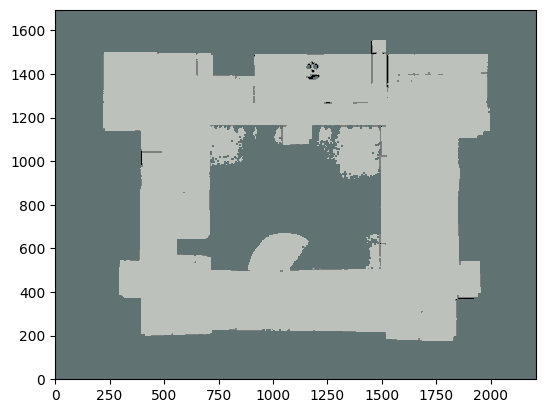

In [10]:
stats.plot_occ_grid(stats.SingleRun(52, real_map='office_big').finalMap,plt.gca())

In [6]:
TS_bigoffice_8.get_perc_areas()

20
Carico finalMap
Carico finalMaps
43
Carico finalMap
Carico finalMaps
60
Carico finalMap
Carico finalMaps
65
Carico finalMap
Carico finalMaps
91
Carico finalMap
Carico finalMaps
93
Carico finalMap
Carico finalMaps
94
Carico finalMap
Carico finalMaps
95
Carico finalMap
Carico finalMaps
97
Carico finalMap
Carico finalMaps
288
Carico finalMap
Carico finalMaps
46
Carico finalMap
Carico finalMaps
51
Carico finalMap
Carico finalMaps
52
Carico finalMap
Carico finalMaps
54
Carico finalMap
Carico finalMaps
69
Carico finalMap
Carico finalMaps
280
Carico finalMap
Carico finalMaps
285
Carico finalMap
Carico finalMaps
282
Carico finalMap
Carico finalMaps
345
Carico finalMap
Carico finalMaps
350
Carico finalMap
Carico finalMaps


{'my': [1.0426597979195396,
  1.0931865251285502,
  1.0671488111812075,
  1.1057024951860241,
  1.0387961276605435,
  1.087730073519202,
  1.03703804381765,
  1.038907798677727,
  0.9757710626599302,
  1.066447928612833],
 'el': [1.0652158740350925,
  1.0394749698965795,
  1.2432121286479505,
  1.0645311543770999,
  1.0600430080351706,
  1.0546651669444973,
  1.1008161535065066,
  1.0568317316134037,
  1.0631646537720927,
  1.0458505033644567]}